In [1]:
import os
import os, sys

import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print(os.listdir("../RANDOM FOREST_XGBOOST_"))

['Exercises.ipynb', '.DS_Store', 'saved_df.pkl', 'exercise_2.ipynb', 'telecom_churn.csv', '.ipynb_checkpoints', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'kyphosis.csv']


In [2]:
df = pd.read_csv("../RANDOM FOREST_XGBOOST_/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(labels=['customerID'], axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
## Shorten the Labels
value_mapper = {'Female': 'F', 'Male': 'M', 'Yes': 'Y', 'No': 'N',
                'No phone service': 'No phone', 'Fiber optic': 'Fiber',
                'No internet service': 'No internet', 'Month-to-month': 'Monthly',
                'Bank transfer (automatic)': 'Bank transfer',
                'Credit card (automatic)': 'Credit card',
                'One year': '1 yr', 'Two year': '2 yr'}
df.replace(to_replace=value_mapper, inplace=True)
# Another method
# df = df.applymap(lambda v: value_mapper[v] if v in value_mapper.keys() else v)

In [7]:
df.columns = [label.lower() for label in df.columns]
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,F,M,M,M,F,F,M,F,F,M
seniorcitizen,0,0,0,0,0,0,0,0,0,0
partner,Y,N,N,N,N,N,N,N,Y,N
dependents,N,N,N,N,N,N,Y,N,N,Y
tenure,1,34,2,45,2,8,22,10,28,62
phoneservice,N,Y,Y,N,Y,Y,Y,N,Y,Y
multiplelines,No phone,N,N,No phone,N,Y,Y,No phone,Y,N
internetservice,DSL,DSL,DSL,DSL,Fiber,Fiber,Fiber,DSL,Fiber,DSL
onlinesecurity,N,Y,Y,Y,N,N,N,Y,N,Y
onlinebackup,Y,N,Y,N,N,N,Y,N,N,Y


In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [10]:
df[np.isnan(df['totalcharges'])]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,F,0,Y,Y,0,N,No phone,DSL,Y,N,Y,Y,Y,N,2 yr,Y,Bank transfer,52.55,NaN,N
753,M,0,N,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.25,NaN,N
936,F,0,Y,Y,0,Y,N,DSL,Y,Y,Y,N,Y,Y,2 yr,N,Mailed check,80.85,NaN,N
1082,M,0,Y,Y,0,Y,Y,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.75,NaN,N
1340,F,0,Y,Y,0,N,No phone,DSL,Y,Y,Y,Y,Y,N,2 yr,N,Credit card,56.05,NaN,N
3331,M,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,19.85,NaN,N
3826,M,0,Y,Y,0,Y,Y,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.35,NaN,N
4380,F,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.00,NaN,N
5218,M,0,Y,Y,0,Y,N,N,No internet,No internet,No internet,No internet,No internet,No internet,1 yr,Y,Mailed check,19.70,NaN,N
6670,F,0,Y,Y,0,Y,Y,DSL,N,Y,Y,Y,Y,N,2 yr,N,Mailed check,73.35,NaN,N


In [11]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [13]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [14]:
summarize_categoricals(df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
gender,"[F, M]",2,0
seniorcitizen,"[0, 1]",2,0
partner,"[Y, N]",2,0
dependents,"[N, Y]",2,0
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",72,0
phoneservice,"[N, Y]",2,0
multiplelines,"[No phone, N, Y]",3,0
internetservice,"[DSL, Fiber, N]",3,0
onlinesecurity,"[N, Y, No internet]",3,0
onlinebackup,"[Y, N, No internet]",3,0


In [15]:
df = to_categorical(find_categorical(df), df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   seniorcitizen     7032 non-null   category
 2   partner           7032 non-null   category
 3   dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   phoneservice      7032 non-null   category
 6   multiplelines     7032 non-null   category
 7   internetservice   7032 non-null   category
 8   onlinesecurity    7032 non-null   category
 9   onlinebackup      7032 non-null   category
 10  deviceprotection  7032 non-null   category
 11  techsupport       7032 non-null   category
 12  streamingtv       7032 non-null   category
 13  streamingmovies   7032 non-null   category
 14  contract          7032 non-null   category
 15  paperlessbilling  7032 non-null   category
 16  paymentmethod     7032 n

In [16]:
new_order = list(df.columns)
new_order.insert(16, new_order.pop(4))
df = df[new_order]
df.head(2)

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges,churn
0,F,0,Y,N,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,1,29.85,29.85,N
1,M,0,N,N,Y,N,DSL,Y,N,Y,N,N,N,1 yr,N,Mailed check,34,56.95,1889.50,N


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


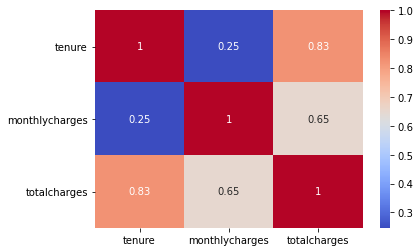

In [18]:
sns.heatmap(data=df[['tenure', 'monthlycharges', 'totalcharges']].corr(),
            annot=True, cmap='coolwarm');

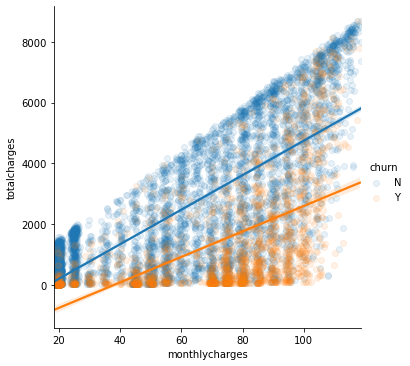

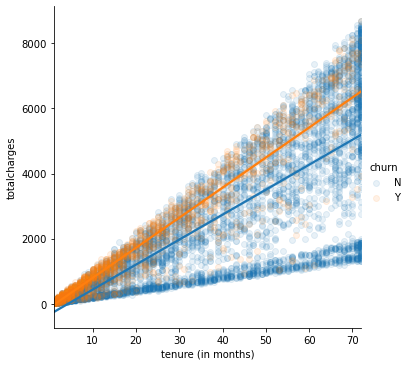

In [19]:
sns.lmplot('monthlycharges', 'totalcharges', data=df, hue='churn',
           scatter_kws={'alpha': 0.1})
fig = sns.lmplot('tenure', 'totalcharges', data=df, hue='churn',
                 scatter_kws={'alpha': 0.1})
fig.set_xlabels('tenure (in months)');

In [20]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [21]:
def categorical_corr_matrix(df):
    """
        Computes corrected Cramer's V statistic between
        all the categorical variables in the dataframe
    """
    df = df.select_dtypes(include='category')
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df_crosstab = pd.crosstab(df[col1], df[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
    
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

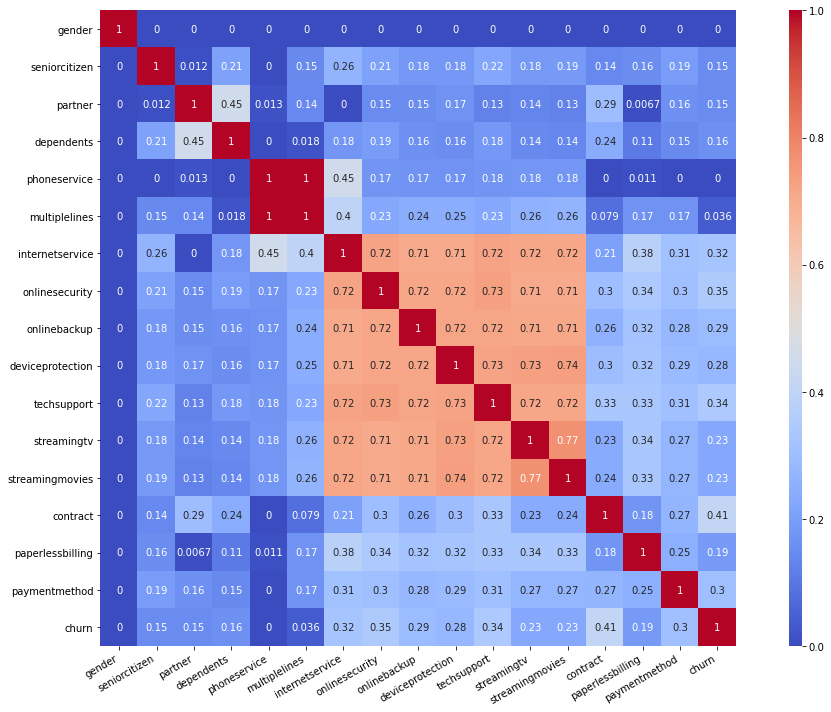

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(categorical_corr_matrix(df), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

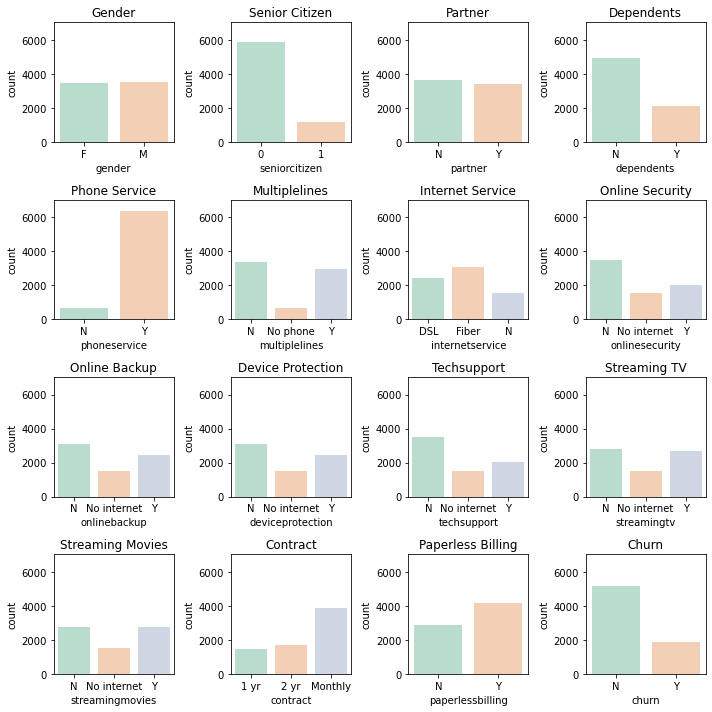

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
          'Phone Service', 'Multiplelines', 'Internet Service', 'Online Security',
          'Online Backup', 'Device Protection', 'Techsupport', 'Streaming TV',
          'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn']

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=''.join(title.lower().split()), data=df, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 7032)

plt.tight_layout()

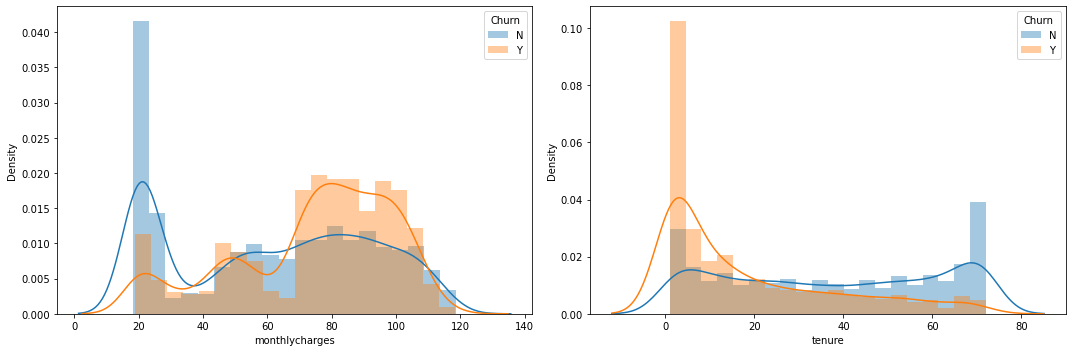

In [24]:
df_grouped = df.groupby(by='churn')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
cols = ['monthlycharges', 'tenure']
for i in range(len(cols)):
    sns.distplot(df_grouped.get_group('N')[cols[i]], bins=20, ax=axes[i], label='N')
    sns.distplot(df_grouped.get_group('Y')[cols[i]], bins=20, ax=axes[i], label='Y')
    axes[i].legend(title='Churn')

fig.tight_layout()

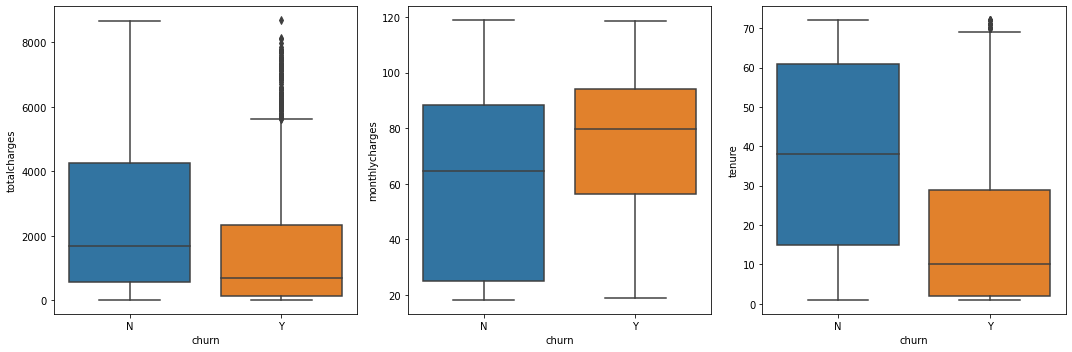

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['totalcharges', 'monthlycharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot(x='churn', y=cols[i], data=df, ax=axes[i])
fig.tight_layout()


Text(0, 0.5, 'Percent of Churned Revenue')

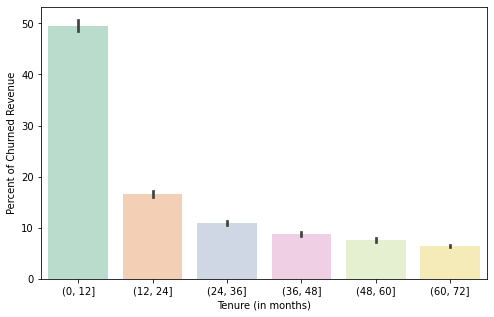

In [26]:
churned_users = df_grouped.get_group('Y')
bins = [(0, 12), (12, 24), (24, 36), (36, 48), (48, 60), (60, 72)]
binned_tenure = pd.cut(list(churned_users['tenure']),
                       bins=pd.IntervalIndex.from_tuples(bins))
revenue_share = churned_users['monthlycharges'] / churned_users['monthlycharges'].sum()
temp_df = pd.DataFrame(data={'tenure':binned_tenure, 
                             'revenue_share(%)': revenue_share * 100})


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.barplot(x='tenure', y='revenue_share(%)', data=temp_df,
            estimator=np.sum, palette='Pastel2', ax=ax)
ax.set_xlabel('Tenure (in months)')
ax.set_ylabel('Percent of Churned Revenue')

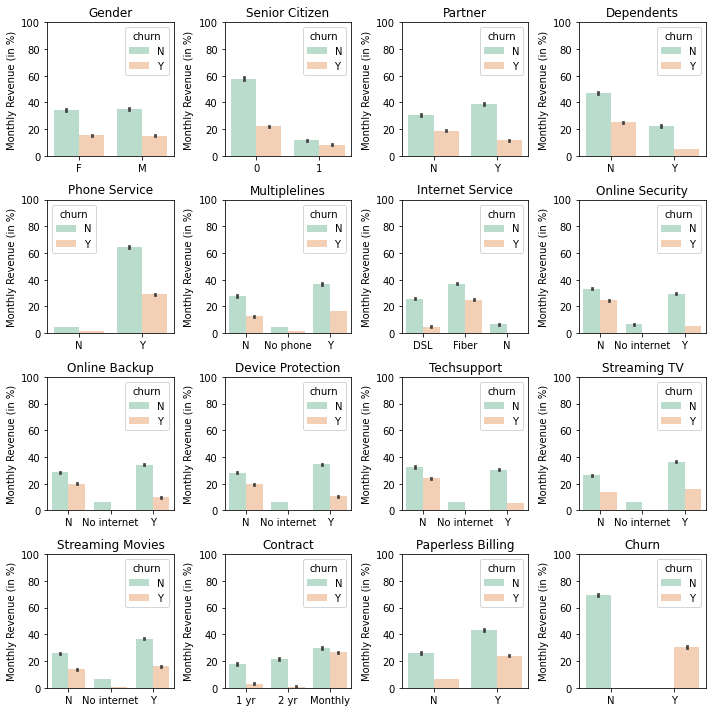

In [27]:
## Adding new column to the dataframe temporarily
# When the dataframe is grouped later, the estimator in `barplot`
# will give groupwise revenue share
df['share'] = (df['monthlycharges'] * 100) / df['monthlycharges'].sum()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
          'Phone Service', 'Multiplelines', 'Internet Service', 'Online Security',
          'Online Backup', 'Device Protection', 'Techsupport', 'Streaming TV',
          'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn']

## axs.flat is an attribute and contains a flattened axs vector/ list
ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.barplot(x=''.join(title.lower().split()), y='share', hue='churn', data=df,
                estimator=np.sum, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 100)
    ax.set_xlabel('')
    ax.set_ylabel('Monthly Revenue (in %)')

fig.tight_layout()

In [28]:
## Remove the 'share' column
df.drop(labels=['share'], axis=1, inplace=True)

phoneservice      N                                            Y              \
multiplelines     N          No phone            Y             N               
internetservice DSL Fiber  N      DSL Fiber  N DSL Fiber  N  DSL Fiber     N   
churn                                                                          
N                 0     0  0      510     0  0   0     0  0  831   628  1077   
Y                 0     0  0      170     0  0   0     0  0  216   530   103   

phoneservice                                       
multiplelines   No phone             Y             
internetservice      DSL Fiber  N  DSL Fiber    N  
churn                                              
N                      0     0  0  616  1171  330  
Y                      0     0  0   73   767   10

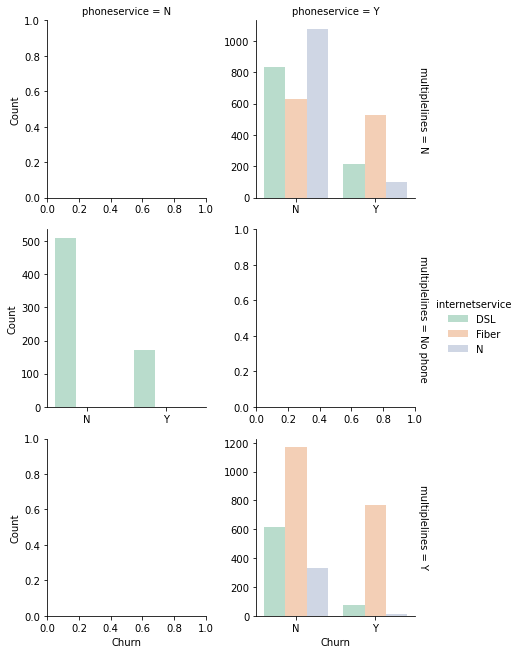

In [29]:
def modified_countplot(**kargs):
    """
        Assumes that columns to be plotted are in of pandas dtype='CategoricalDtype'
    """
    facet_gen = kargs['facet_generator']    ## Facet generator over facet data
    curr_facet, facet_data = None, None
    
    while True:
        ## Keep yielding until non-empty dataframe is found
        curr_facet = next(facet_gen)            ## Yielding facet genenrator
        df_rows = curr_facet[1].shape[0]
        
        ## Skip the current facet if its corresponding dataframe empty
        if df_rows:
            facet_data = curr_facet[1]
            break
    
    x_hue = (kargs.get('x'), kargs.get('hue'))
    cols = [col for col in x_hue if col]
    col_categories = [facet_data[col].dtype.categories if col else None for col in x_hue]
    
    palette = kargs['palette'] if 'palette' in kargs.keys() else 'Pastel2'
    sns.countplot(x=cols[0], hue=x_hue[1], 
                  order=col_categories[0], hue_order=col_categories[1],
                  data=facet_data.loc[:, cols], palette=palette)
## phone service, multiple lines, internet service
display(pd.crosstab(df['churn'], [df['phoneservice'], df['multiplelines'], df['internetservice']], dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='multiplelines', col='phoneservice',
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

phoneservice       N                           Y                           
seniorcitizen      0            1              0                1          
internetservice  DSL Fiber  N DSL Fiber  N   DSL Fiber     N  DSL Fiber   N
churn                                                                      
N                450     0  0  60     0  0  1326  1361  1360  121   438  47
Y                126     0  0  44     0  0   255   904   108   34   393   5

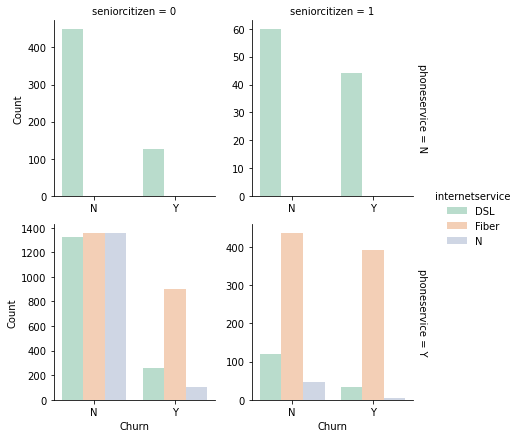

In [30]:
## phone service, internet service, seniorcitizen
crosstab_cols = [df['phoneservice'], df['seniorcitizen'], df['internetservice']]
display(pd.crosstab(df['churn'], crosstab_cols, dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='phoneservice', col='seniorcitizen', 
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice', 
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

phoneservice       N                           Y                           
gender             F             M             F               M           
internetservice  DSL Fiber  N  DSL Fiber  N  DSL Fiber    N  DSL Fiber    N
churn                                                                      
N                249     0  0  261     0  0  716   889  690  731   910  717
Y                 80     0  0   90     0  0  139   664   56  150   633   57

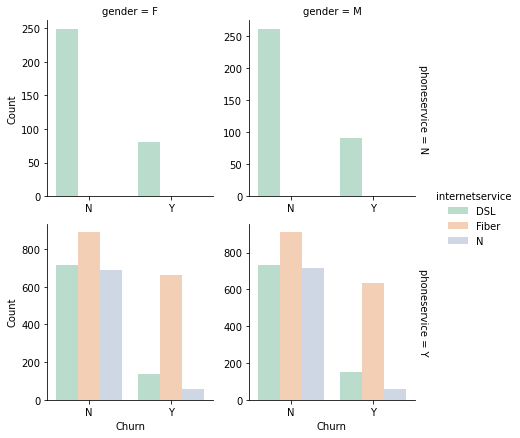

In [31]:
## phone service, internet service, gender
crosstab_cols = [df['phoneservice'], df['gender'], df['internetservice']]
display(pd.crosstab(df['churn'], crosstab_cols, dropna=False))

## PLOT
facet = sns.FacetGrid(df, row='phoneservice', col='gender', 
                      sharex=False, sharey=False, margin_titles=True)
facet.map(modified_countplot, x='churn', hue='internetservice',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='internetservice');

internetservice     N              Y                
streamingtv         N     Y        N         Y      
streamingmovies     N  Y  N  Y     N    Y    N     Y
churn                                               
N                1407  0  0  0  1322  545  521  1368
Y                 113  0  0  0   695  247  243   571

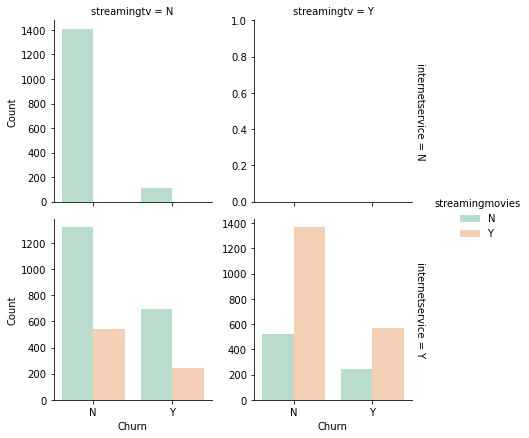

In [32]:
## internet service, streamingtv, streamingmovies
# Remap values
## Having 'DSL' or 'Fiber' internet implies having internet
value_mapper = {'internetservice':  {'Fiber': 'Y', 'DSL': 'Y', 
                                     'No internet': 'N'},
                'streamingtv': {'No internet': 'N'},
                'streamingmovies': {'No internet': 'N'}}
df_modified = df.replace(to_replace=value_mapper)
df_modified = to_categorical(list(value_mapper.keys()), df_modified)

display(pd.crosstab(df_modified['churn'], 
                    [df_modified['internetservice'], 
                     df_modified['streamingtv'], 
                     df_modified['streamingmovies']], 
                    dropna=False))

## PLOT
facet = sns.FacetGrid(df_modified, row='internetservice', col='streamingtv', 
                      sharey=False, margin_titles=True)
facet_data = facet.facet_data()
facet.map(modified_countplot, x='churn', hue='streamingmovies', 
          palette='Pastel2', facet_generator=facet_data)
facet.set_xlabels('Churn')
facet.set_ylabels('Count')
facet.add_legend(title='streamingmovies');

contract        1 yr            2 yr            Monthly           
internetservice  DSL Fiber    N  DSL Fiber    N     DSL Fiber    N
churn                                                             
N                517   435  354  611   398  628     829   966  425
Y                 53   104    9   12    31    5     394  1162   99

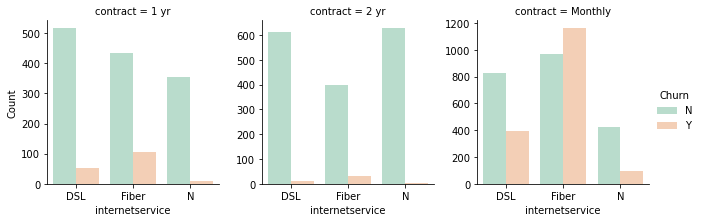

In [33]:
## phone service, multiple lines, internet service
display(pd.crosstab(df['churn'], [df['contract'], df['internetservice']], dropna=False))

## PLOT
facet = sns.FacetGrid(df, col='contract',sharex=False, sharey=False)
facet.map(modified_countplot, x='internetservice', hue='churn',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('internetservice')
facet.set_ylabels('Count')
facet.add_legend(title='Churn');

In [34]:
x = df.iloc[:, :-1]
y = df['churn']

categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

In [35]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(7032, 19), (7032,), (5274, 19), (1758, 19), (5274,), (1758,)]

In [36]:
pd.Series(y_test).value_counts()

N    1291
Y     467
Name: churn, dtype: int64

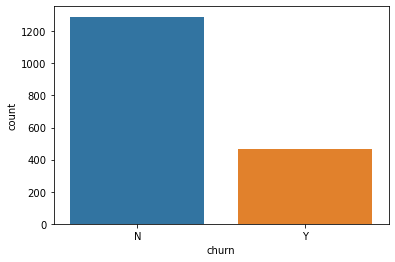

In [37]:
sns.countplot(x=y_test);

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

categorical_columns = list(x.select_dtypes(include='category').columns)


## Column Transformer
transformers = [('one_hot_encoder',
                  OneHotEncoder(drop='first',dtype='int'),
                  categorical_columns),
                ('standard_scaler', StandardScaler(), numeric_columns)]
x_trans = ColumnTransformer(transformers, remainder='passthrough')

## Applying Column Transformer
x_train = x_trans.fit_transform(x_train)
x_test = x_trans.transform(x_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)


## Save feature names after one-hot encoding for feature importances plots
feature_names = list(x_trans.named_transformers_['one_hot_encoder'] \
                            .get_feature_names(input_features=categorical_columns))
feature_names = feature_names + numeric_columns

In [39]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))
def report(clf, x_train, y_train, x_test, y_test, sample_weight=None,
           refit=False, importance_plot=False, confusion_labels=None,
           feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                                     sample_weight=sample_weight,
                                                     refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
    
    
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("------------------------------------------")
    print(" Area Under ROC: ", roc_auc)
    print("------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, train_acc=train_acc, train_time=train_time,
                train_predictions=train_predictions, test_acc=test_acc,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump
def compare_models(y_test=None, clf_reports=[], labels=[]):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train Accuracy', 'Test Accuracy', 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        train_acc = round(clf_reports[i]['train_acc'], 3)
        test_acc = round(clf_reports[i]['test_acc'], 3)
        clf_probs = clf_reports[i]['test_probs']
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = [train_acc, test_acc,
                               test_acc < train_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

CategoricalNB()

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.005 seconds
 Testing Time: 0.001 seconds
------------------------------------------
Train Accuracy:  0.7387182404247251
 Test Accuracy:  0.7377701934015927
------------------------------------------
 Area Under ROC:  0.8212439272379859
------------------------------------------
Model Memory Size: 5.77 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1291
       Churn       0.50      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758


================================> CONFUSION MATRIX <======

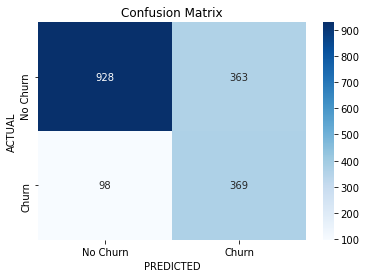


=======================================> PLOTS <=========================================


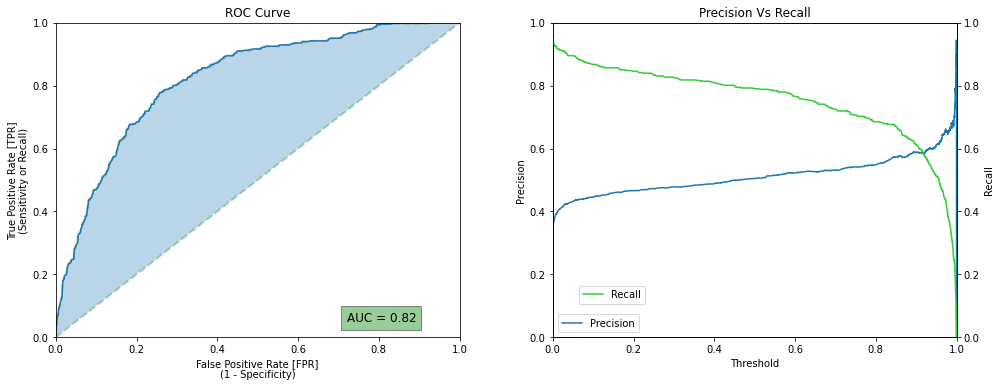

In [40]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB 
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder

confusion_lbs = ['No Churn', 'Churn']

## Discretize 'monthlycharges' and 'totalcharges' into 3bins
kbn = KBinsDiscretizer(n_bins=3, encode='ordinal')
ode = OrdinalEncoder(dtype=np.int64)
nb_trans = [('ordinal', ode, categorical_columns),
            ('kbn', kbn, numeric_columns[1:])]
nb_col_trans = ColumnTransformer(nb_trans, remainder='passthrough')

## Applying Column Transformer
x_train_nb = nb_col_trans.fit_transform(x_train_cat)
x_test_nb = nb_col_trans.transform(x_test_cat)

nb_clf = CategoricalNB()

nb_clf, nb_report = report(nb_clf, x_train_nb, y_train,
                           x_test_nb, y_test, refit=True,
                           confusion_labels=confusion_lbs)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500, n_jobs=-1,
                     penalty='l1', random_state=0, scoring='f1',
                     solver='liblinear')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 3.183 seconds
 Testing Time: 0.0 seconds
------------------------------------------
Train Accuracy:  0.7510428517254456
 Test Accuracy:  0.7514220705346986
------------------------------------------
 Area Under ROC:  0.844624371990572
------------------------------------------
Model Memory Size: 14.15 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1291
       Churn       0.52      0.78      0.63       467

    accuracy                           0.75      1758
   

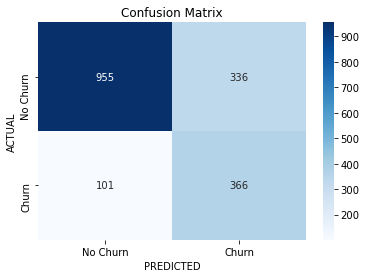


=======================================> PLOTS <=========================================


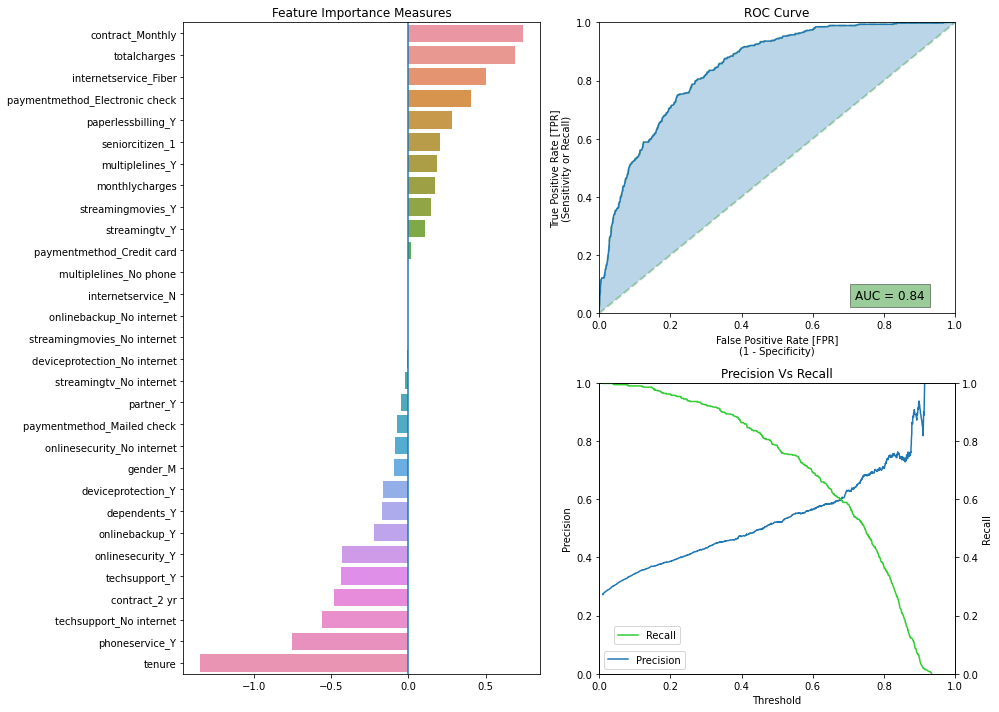

In [41]:
from sklearn.linear_model import LogisticRegressionCV

logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500,
                                scoring='f1', penalty='l1', solver='liblinear',
                                n_jobs=-1, random_state=0, refit=True, verbose=0)

logit_cv, logit_report = report(logit_cv, x_train, y_train,
                                x_test, y_test, refit=True,
                                importance_plot=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

KNeighborsClassifier(n_jobs=-1, n_neighbors=91, p=1)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.001 seconds
 Testing Time: 0.286 seconds
------------------------------------------
Train Accuracy:  0.7999620781190747
 Test Accuracy:  0.7969283276450512
------------------------------------------
 Area Under ROC:  0.8429449806517529
------------------------------------------
Model Memory Size: 1277.99 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.86      1291
       Churn       0.63      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758


==================

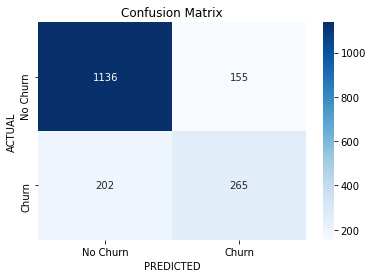


=======================================> PLOTS <=========================================


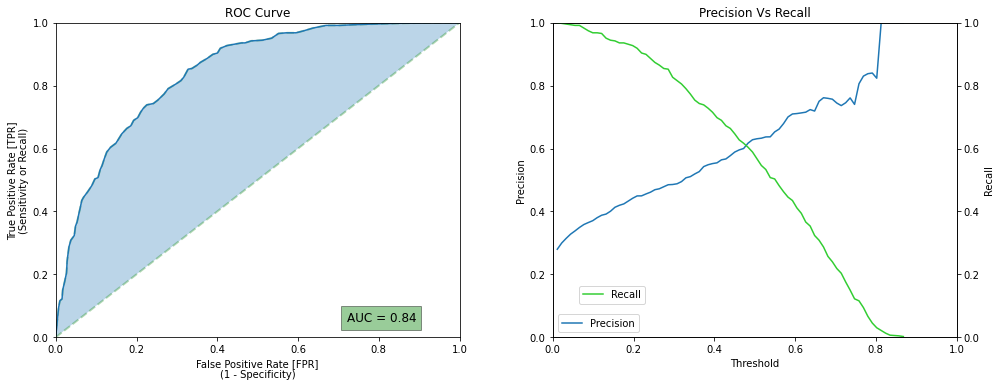

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=91, p=1,
                           weights='uniform', n_jobs=-1)

knn, knn_report = report(knn, x_train, y_train,
                         x_test, y_test,
                         importance_plot=True,
                         feature_labels=feature_names,
                         confusion_labels=confusion_lbs)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.008 seconds
 Testing Time: 0.0 seconds
------------------------------------------
Train Accuracy:  0.7533181645809632
 Test Accuracy:  0.7502844141069397
------------------------------------------
 Area Under ROC:  0.8176902522321391
------------------------------------------
Model Memory Size: 2.17 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.82      1291
       Churn       0.52      0.74      0.61       467

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted av

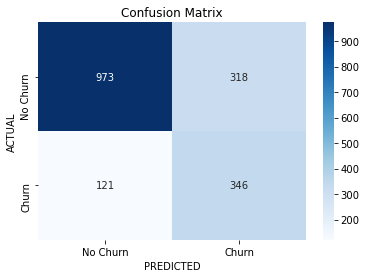


=======================================> PLOTS <=========================================


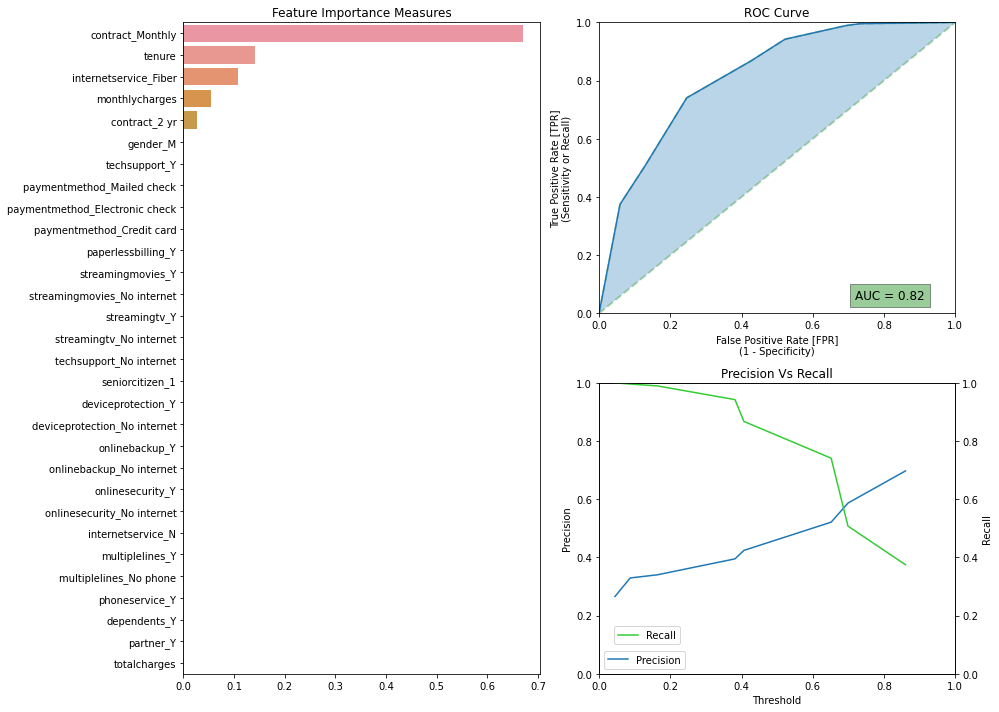

In [43]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(class_weight='balanced',
                                       criterion='entropy',
                                       max_depth=3,
                                       random_state=0)

decision_tree, decision_tree_report = report(decision_tree, x_train, y_train,
                                             x_test, y_test,
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=2,
                                                        random_state=0),
                  max_features=15, max_samples=110, n_estimators=80, n_jobs=-1,
                  random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.886 seconds
 Testing Time: 0.039 seconds
------------------------------------------
Train Accuracy:  0.748388320060675
 Test Accuracy:  0.7434584755403868
------------------------------------------
 Area Under ROC:  0.8372333914416559
------------------------------------------
Model Memory Size: 82.88 kB

=============================> CLASSIFICATION REPORT <========================

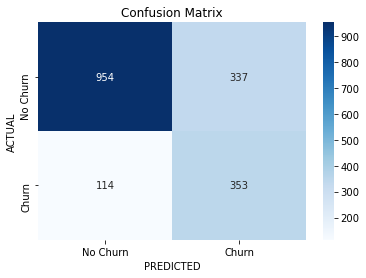


=======================================> PLOTS <=========================================


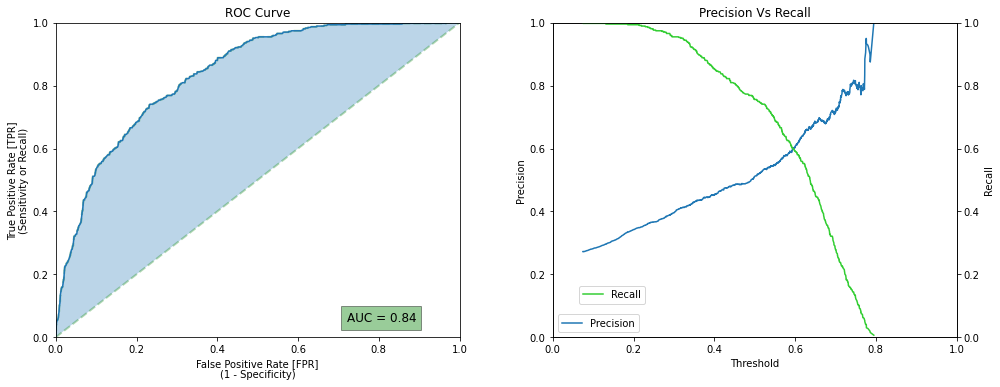

In [44]:
from sklearn.ensemble import BaggingClassifier

bagging_dtree = DecisionTreeClassifier(max_depth=2, class_weight='balanced',
                                       criterion='entropy', random_state=0)

bagging_clf = BaggingClassifier(base_estimator=bagging_dtree,
                                max_samples=110, n_estimators=80,
                                max_features=15, n_jobs=-1,
                                random_state=0)

bagging_clf, bagging_clf_report = report(bagging_clf, x_train, y_train,
                                         x_test, y_test,
                                         feature_labels=feature_names,
                                         confusion_labels=confusion_lbs)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, n_jobs=-1, random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.146 seconds
 Testing Time: 0.018 seconds
------------------------------------------
Train Accuracy:  0.6996587030716723
 Test Accuracy:  0.7002275312855518
------------------------------------------
 Area Under ROC:  0.8339616883149193
------------------------------------------
Model Memory Size: 51.98 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.91      0.66      0.76      1291
       Churn       0.46      0.82      0.59       467

    accuracy                           0.70      1758
   macro avg       0.69      0.74      0.68      17

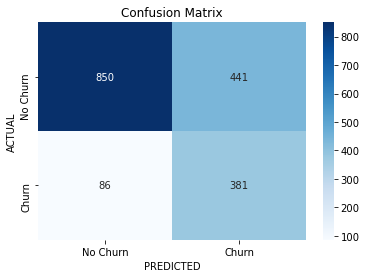


=======================================> PLOTS <=========================================


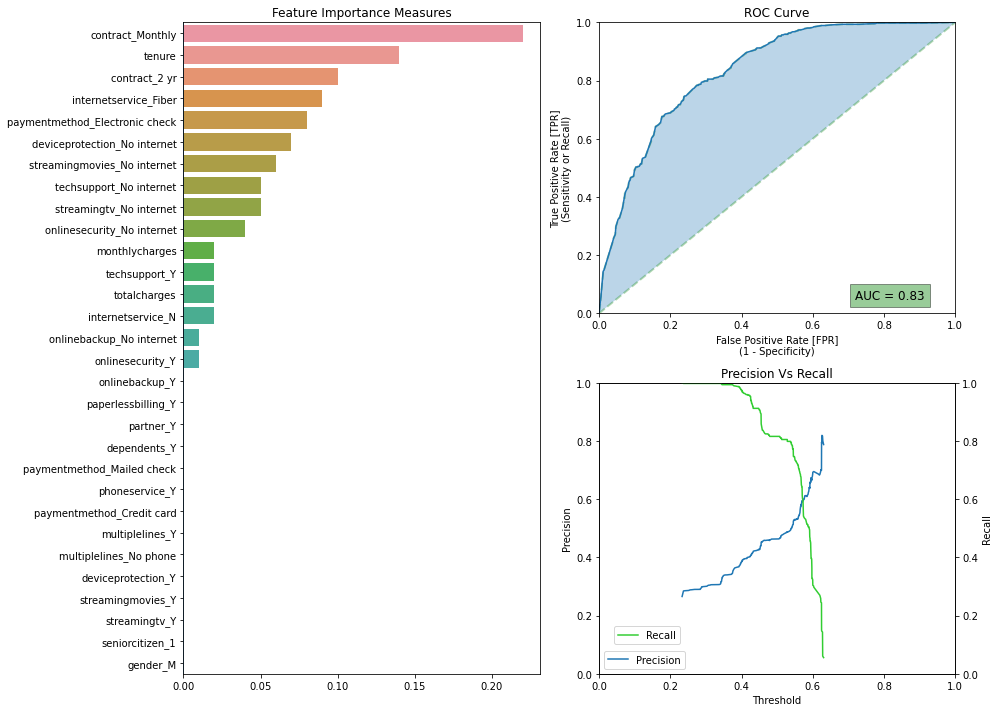

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                                       max_depth=1, n_estimators=100,
                                       n_jobs=-1, random_state=0)

random_forest, random_forest_report = report(random_forest, x_train, y_train,
                                             x_test, y_test,
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=285, random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 1.282 seconds
 Testing Time: 0.077 seconds
------------------------------------------
Train Accuracy:  0.748767538869928
 Test Accuracy:  0.7457337883959044
------------------------------------------
 Area Under ROC:  0.8477244040026737
------------------------------------------
Model Memory Size: 150.15 kB

=============================> CLASSIFICATION REPORT <===================================
              precision  

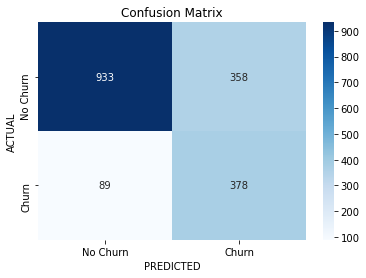


=======================================> PLOTS <=========================================


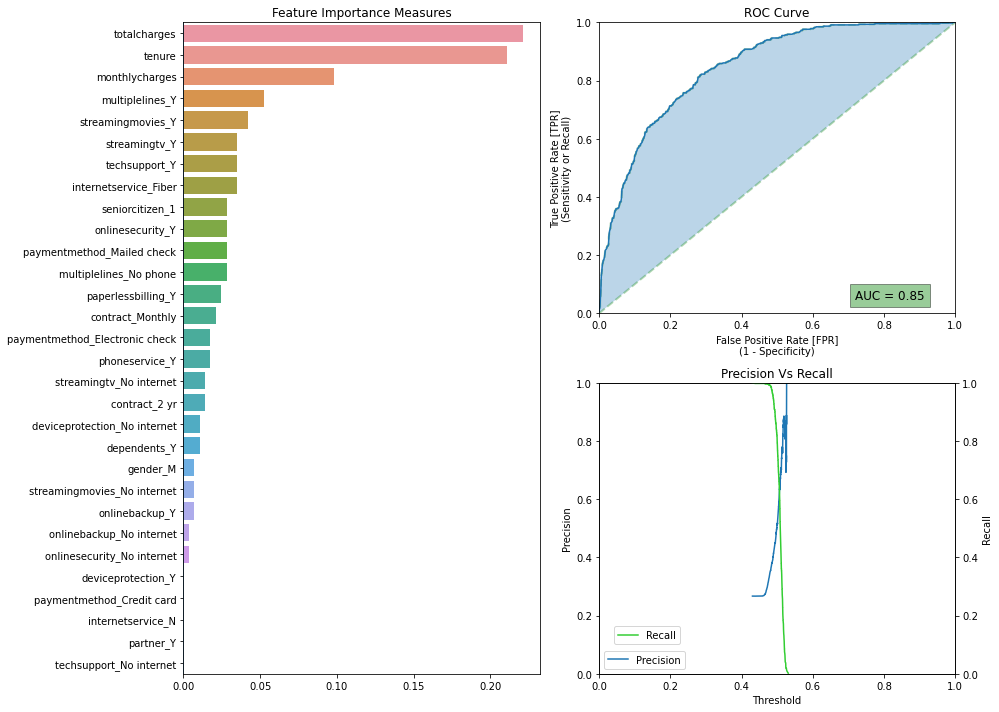

In [46]:
from sklearn.ensemble import AdaBoostClassifier

boosting_dtree = DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        max_depth=1, random_state=0)
adaboot = AdaBoostClassifier(base_estimator=boosting_dtree,
                             n_estimators=285, learning_rate=0.1,
                             random_state=0)

adaboot, adaboot_report = report(adaboot, x_train, y_train,
                                 x_test, y_test,
                                 importance_plot=True,
                                 feature_labels=feature_names,
                                 confusion_labels=confusion_lbs)


SVC(class_weight='balanced', kernel='linear', probability=True, random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 3.582 seconds
 Testing Time: 0.113 seconds
------------------------------------------
Train Accuracy:  0.7000379218809253
 Test Accuracy:  0.7007963594994312
------------------------------------------
 Area Under ROC:  0.8324465041292294
------------------------------------------
Model Memory Size: 751.51 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.91      0.66      0.76      1291
       Churn       0.46      0.81      0.59       467

    accuracy                           0.70      1758
   macro avg       0.69      0.74      0.68      1758
weighted avg       0.79      0.70      0.72     

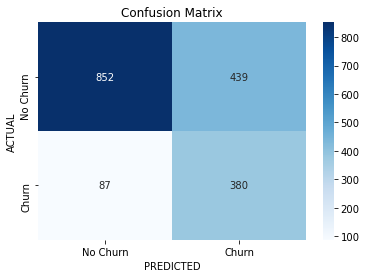


=======================================> PLOTS <=========================================


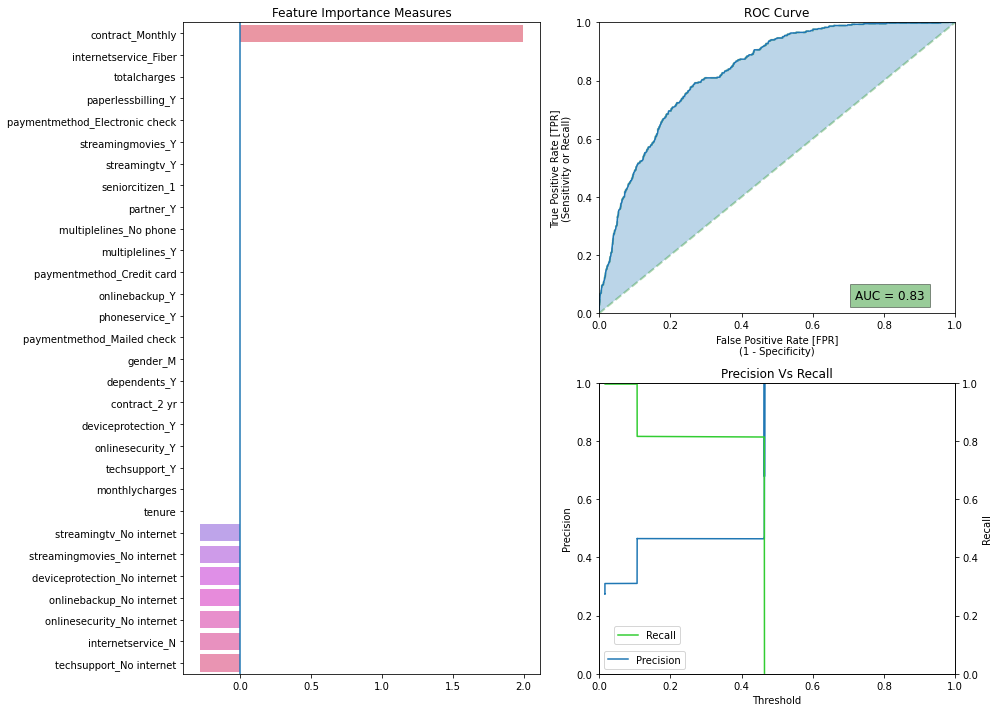

In [47]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', probability=True,
                 class_weight='balanced', random_state=0)

linear_svc, linear_svc_report = report(linear_svc, x_train, y_train,
                                       x_test, y_test,
                                       importance_plot=True,
                                       feature_labels=feature_names,
                                       confusion_labels=confusion_lbs)

SVC(C=0.3, class_weight='balanced', probability=True, random_state=0)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 4.649 seconds
 Testing Time: 0.456 seconds
------------------------------------------
Train Accuracy:  0.7514220705346986
 Test Accuracy:  0.7417519908987485
------------------------------------------
 Area Under ROC:  0.8294808234242333
------------------------------------------
Model Memory Size: 732.97 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.73      0.81      1291
       Churn       0.51      0.77      0.61       467

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.79      0.74      0.75      1758


==

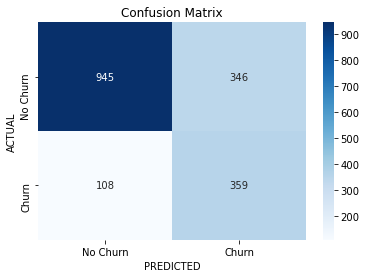


=======================================> PLOTS <=========================================


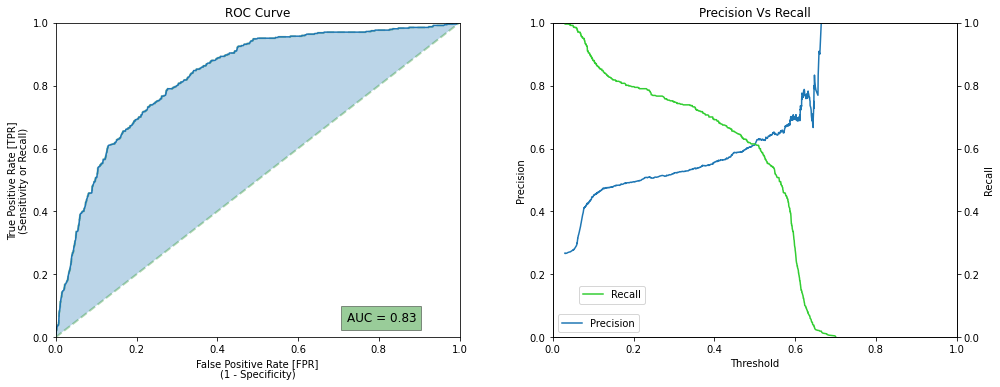

In [48]:
rbf_svc = SVC(C=0.3, kernel='rbf', probability=True,
              class_weight='balanced', random_state=0)

rbf_svc, rbf_svc_report = report(rbf_svc, x_train, y_train,
                                 x_test, y_test,
                                 importance_plot=True,
                                 feature_labels=feature_names,
                                 confusion_labels=confusion_lbs)

[03:03:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.761768901569187,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

=============================> T

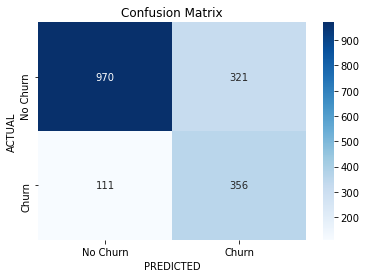


=======================================> PLOTS <=========================================


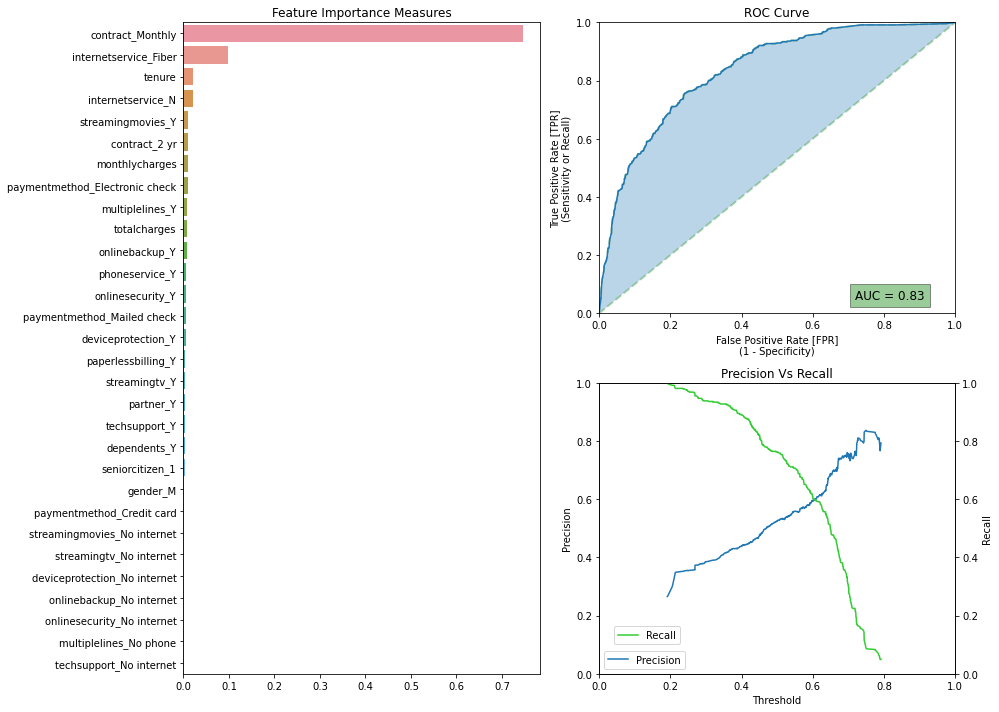

In [49]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.01, random_state=0,
                        scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(x_train, y_train);

xgb_clf, xgb_report = report(xgb_clf, x_train, y_train,
                             x_test, y_test,
                             importance_plot=True,
                             feature_labels=feature_names,
                             confusion_labels=confusion_lbs)

In [50]:
report_list = [nb_report, logit_report, knn_report, decision_tree_report,               
               bagging_clf_report, random_forest_report, adaboot_report,
               xgb_report, linear_svc_report, rbf_svc_report, ]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]
clf_labels[-3], clf_labels[-2] = 'Linear SVC', 'RBF SVC'

In [51]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list, labels=clf_labels)

compare_table.sort_values(by=['Overfitting'])

,Train Accuracy,Test Accuracy,Overfitting,ROC Area,Precision,Recall,F1-score,Support
LogisticRegressionCV,0.751,0.751,False,0.844624,0.521368,0.783726,0.626176,467
RandomForestClassifier,0.7,0.7,False,0.833962,0.463504,0.815846,0.591156,467
RBF SVC,0.7,0.701,False,0.832447,0.46398,0.813704,0.59098,467
CategoricalNB,0.739,0.738,True,0.821244,0.504098,0.79015,0.615513,467
KNeighborsClassifier,0.8,0.797,True,0.842945,0.630952,0.567452,0.59752,467
DecisionTreeClassifier,0.753,0.75,True,0.81769,0.521084,0.740899,0.611848,467
BaggingClassifier,0.748,0.743,True,0.837233,0.511594,0.755889,0.610199,467
AdaBoostClassifier,0.749,0.746,True,0.847724,0.513587,0.809422,0.628429,467
Linear SVC,0.788,0.754,True,0.834755,0.525849,0.762313,0.622378,467
SVC,0.751,0.742,True,0.829481,0.50922,0.768737,0.612628,467


In [52]:
df_charges = list()
new_cols = ['RRM/customer', 'RRM %', 'RRT %']

for rep in report_list:
    y_pred = rep['test_predictions']
    true_positives = (y_test * y_pred).reshape(y_test.shape[0], 1)
    tp_revenue = (x_test_charges * true_positives).sum(axis=0)
    tp_revenue = np.insert(tp_revenue, 0, tp_revenue[0] / true_positives.sum())
    df_charges.append(tp_revenue)

revenue_saved = pd.DataFrame(df_charges, index=clf_labels, 
                             columns=new_cols)

compare_table_rev = pd.concat([compare_table, revenue_saved], axis=1)

## True Positive Revenue/ Total Churn Revenue
total_churn_revenue = (x_test_charges * y_test.reshape(y_test.shape[0], 1)).sum(axis=0)
temp_cols = (compare_table_rev.iloc[:, -2:] / total_churn_revenue) * 100
compare_table_rev.iloc[:, -2:] = temp_cols

In [53]:
compare_table_rev.sort_values(by=['Overfitting'])

,Train Accuracy,Test Accuracy,Overfitting,ROC Area,Precision,Recall,F1-score,Support,RRM/customer,RRM %,RRT %
LogisticRegressionCV,0.751,0.751,False,0.844624,0.521368,0.783726,0.626176,467,77.847268,80.909103,60.717482
RandomForestClassifier,0.7,0.7,False,0.833962,0.463504,0.815846,0.591156,467,76.688583,82.971437,64.536319
RBF SVC,0.7,0.701,False,0.832447,0.46398,0.813704,0.59098,467,76.612368,82.671422,64.477005
CategoricalNB,0.739,0.738,True,0.821244,0.504098,0.79015,0.615513,467,76.813957,80.489536,58.436784
KNeighborsClassifier,0.8,0.797,True,0.842945,0.630952,0.567452,0.59752,467,79.109623,59.531676,28.480971
DecisionTreeClassifier,0.753,0.75,True,0.81769,0.521084,0.740899,0.611848,467,78.011127,76.648838,58.947564
BaggingClassifier,0.748,0.743,True,0.837233,0.511594,0.755889,0.610199,467,76.585836,76.770803,48.239706
AdaBoostClassifier,0.749,0.746,True,0.847724,0.513587,0.809422,0.628429,467,76.257672,81.855576,62.016566
Linear SVC,0.788,0.754,True,0.834755,0.525849,0.762313,0.622378,467,75.987219,76.818084,53.091100
SVC,0.751,0.742,True,0.829481,0.50922,0.768737,0.612628,467,76.768663,78.262073,53.470557


In [54]:
select_cols = ['Overfitting', 'F1-score'] + new_cols
compare_table_rev[select_cols].sort_values(by=['Overfitting', 'RRM %'],
                                           ascending=[True, False])

,Overfitting,F1-score,RRM/customer,RRM %,RRT %
RandomForestClassifier,False,0.591156,76.688583,82.971437,64.536319
RBF SVC,False,0.59098,76.612368,82.671422,64.477005
LogisticRegressionCV,False,0.626176,77.847268,80.909103,60.717482
AdaBoostClassifier,True,0.628429,76.257672,81.855576,62.016566
CategoricalNB,True,0.615513,76.813957,80.489536,58.436784
SVC,True,0.612628,76.768663,78.262073,53.470557
Linear SVC,True,0.622378,75.987219,76.818084,53.091100
BaggingClassifier,True,0.610199,76.585836,76.770803,48.239706
DecisionTreeClassifier,True,0.611848,78.011127,76.648838,58.947564
KNeighborsClassifier,True,0.59752,79.109623,59.531676,28.480971


In [55]:
compare_table_rev[select_cols].sort_values(by=['Overfitting', 'RRM/customer'],
                                           ascending=[True, False])

,Overfitting,F1-score,RRM/customer,RRM %,RRT %
LogisticRegressionCV,False,0.626176,77.847268,80.909103,60.717482
RandomForestClassifier,False,0.591156,76.688583,82.971437,64.536319
RBF SVC,False,0.59098,76.612368,82.671422,64.477005
KNeighborsClassifier,True,0.59752,79.109623,59.531676,28.480971
DecisionTreeClassifier,True,0.611848,78.011127,76.648838,58.947564
CategoricalNB,True,0.615513,76.813957,80.489536,58.436784
SVC,True,0.612628,76.768663,78.262073,53.470557
BaggingClassifier,True,0.610199,76.585836,76.770803,48.239706
AdaBoostClassifier,True,0.628429,76.257672,81.855576,62.016566
Linear SVC,True,0.622378,75.987219,76.818084,53.091100
